In [28]:

import numpy as np
import matplotlib.pyplot as plt
import helpers as hp
from pathlib import Path
from config import PathConfigs
import os
import pandas as pd



In [29]:
string = "test_var"
globals()[string] = 42

# thats cool, didnt know you could dynamically declare variables
test_var

42

In [30]:
Delta = 0.5
mu = 1.0
V_c = np.sqrt(mu**2 + Delta ** 2)

V_c

1.118033988749895

In [31]:

save_plots = True

dirname = "corr_clean_dis_test"
save_dir = Path(PathConfigs.DATA/dirname/"Plots")

os.makedirs(save_dir, exist_ok=True)





In [32]:

barrier_left_conductance_left_arr = hp.np_load_wrapped("barrier_left_conductance_left_arr", dirname)
barrier_right_conductance_right_arr = hp.np_load_wrapped("barrier_right_conductance_right_arr", dirname)
barrier_left_conductance_right_arr = hp.np_load_wrapped("barrier_left_conductance_right_arr", dirname)
barrier_right_conductance_left_arr = hp.np_load_wrapped("barrier_right_conductance_left_arr", dirname)
dIdVs_left_arr = hp.np_load_wrapped("dIdVs_left_arr", dirname)
dIdVs_right_arr = hp.np_load_wrapped("dIdVs_right_arr", dirname)
energies = hp.np_load_wrapped("energies", dirname)
ldos = hp.np_load_wrapped("LDOS", dirname)

pdi_arr = hp.np_load_wrapped("pdi_data", dirname)

Conductance_matrix = hp.np_load_wrapped("Conductance_matrix", dirname)

gamma_sq_arr = hp.np_load_wrapped("gamma_sq_arr", dirname)

mp_arr = hp.np_load_wrapped("mp_arr", dirname)

rG_corr = hp.np_load_wrapped("rG_corr", dirname)

params_list = hp.np_load_wrapped("params_list", dirname)

#return [mu_pm * V_c, vz_raw, pdi_val]
#new_pdi_dat = np.asarray([[pdr[0]/V_c, pdr[1]*V_c, pdr[2]] for pdr in pdi_arr])



In [33]:
def filter_pdi(pdis):
    for i in range(len(pdis)):
        pdi = pdis[i]
        if pdi > 1:
            pdis[i] = 1.04
        elif pdi < 0:
            pdis[i] = 0
            
    return pdis
    

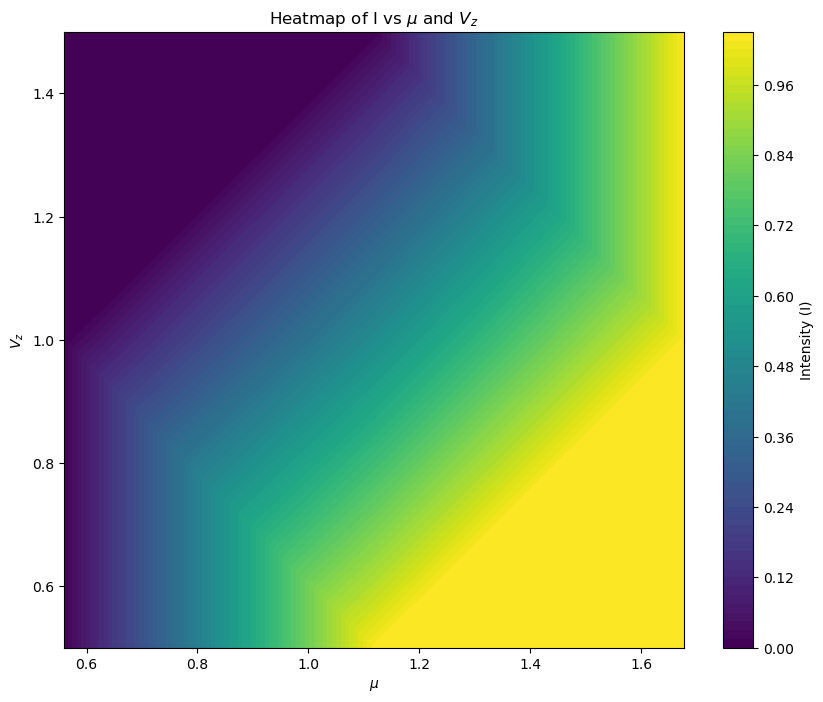

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mu =  pdi_arr[:, 0]  # x-axis
V_z = pdi_arr[:, 1]  # y-axis
I =   filter_pdi(pdi_arr[:, 2])  # z-axis (color)
#I =   pdi_arr[:, 2]  # z-axis (color)

# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, I, levels=100, cmap='viridis')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.xlabel(r'$\mu$')
plt.ylabel(r'$V_z$')
plt.title('Heatmap of I vs $\mu$ and $V_z$')

plt.show()

In [35]:
params_list

array([[0. , 0.5, 0.5],
       [1. , 0.5, 1. ],
       [2. , 0.5, 1.5],
       [3. , 1. , 0.5],
       [4. , 1. , 1. ],
       [5. , 1. , 1.5],
       [6. , 1.5, 0.5],
       [7. , 1.5, 1. ],
       [8. , 1.5, 1.5]])

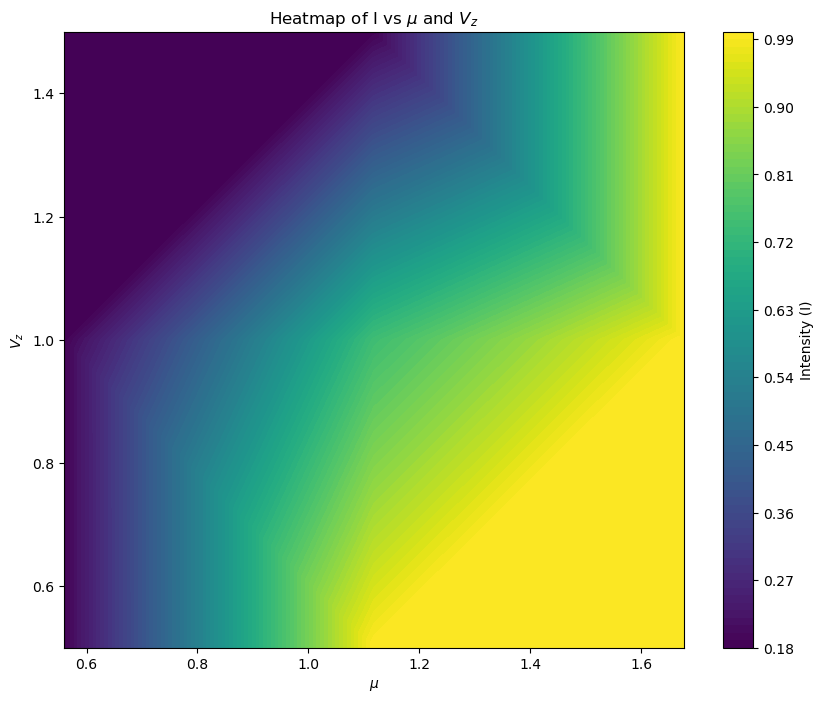

In [36]:
import numpy as np
import matplotlib.pyplot as plt

mu  =  params_list[:, 1]  # x-axis
V_z =  params_list[:, 2]*V_c  # y-axis
I   =  rG_corr  #filter_pdi(pdi_arr[:, 2])  # z-axis (color)


# 3. Create the heatmap
plt.figure(figsize=(10, 8))

# tricontourf creates a smooth filled contour plot
# levels=100 makes it look like a continuous heatmap
contour = plt.tricontourf(V_z, mu, I, levels=100, cmap='viridis')

# Add a colorbar to show what I values the colors represent
cbar = plt.colorbar(contour)
cbar.set_label('Intensity (I)')

# 4. Label axes
plt.xlabel(r'$\mu$')
plt.ylabel(r'$V_z$')
plt.title('Heatmap of I vs $\mu$ and $V_z$')

plt.show()

In [37]:
pdi_arr[:,1]/V_c

array([0.5, 1. , 1.5, 0.5, 1. , 1.5, 0.5, 1. , 1.5])

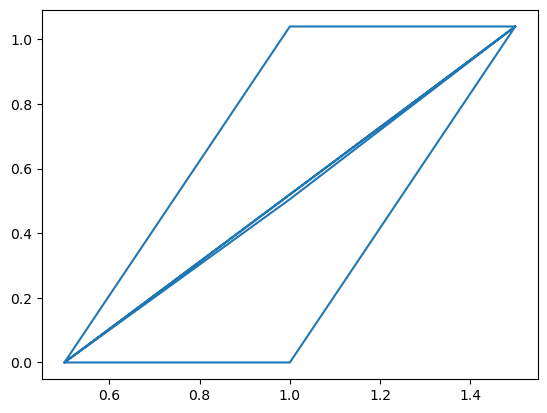

In [38]:
data = {
    'mu': pdi_arr[:, 0],
    'V_z':pdi_arr[:, 1],
    'I': filter_pdi(pdi_arr[:, 2])
}

df = pd.DataFrame(data = data)

minval = np.min(np.abs(pdi_arr[:, 0] - mu))

val = minval + mu

mudf = df[np.isclose(df['mu'], val,rtol = 1e-6) ]


plt.plot(mudf['V_z']/V_c, mudf['I'])


In [39]:
mu = 1
Delta = 0.5
V_c = np.sqrt(mu**2 + Delta**2)
num_vz_var = mp_arr.shape[0]
Vz_var = np.linspace(0.3, 1.7, num_vz_var) 
Vzs = V_c * Vz_var


len dIdVs_left_arr: (9, 101)
len Vzs: 9
len energies: 101


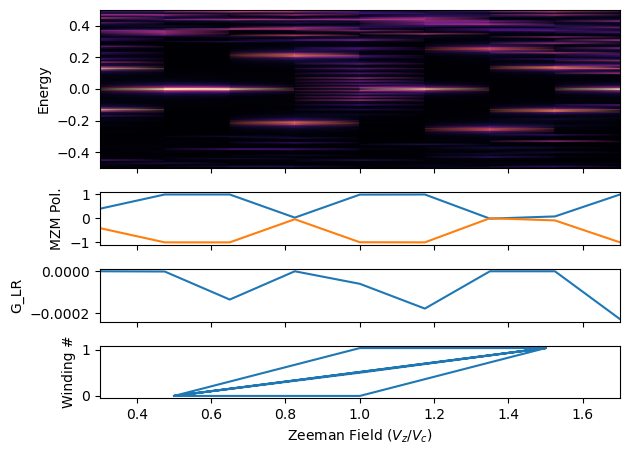

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous data generation code: energies, Vz_var, dIdVs_left_arr, etc.) ...

print(f"len dIdVs_left_arr: {dIdVs_left_arr.shape}")
print(f"len Vzs: {len(Vz_var)}")  # Adjusted variable name based on your meshgrid usage
print(f"len energies: {len(energies)}")

# Prepare Grid
Y, X = np.meshgrid(energies, Vz_var)
Z = dIdVs_left_arr

# Update: 3 rows, height ratios [3, 1, 1] to make ax2 and ax3 equal size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# --- Plot 1: Heatmap ---
mesh = ax1.pcolormesh(X, Y, Z, cmap='magma', shading='gouraud')
ax1.set_ylabel("Energy") 

# --- Plot 2: MZM Polarization (Top Line Plot) ---
ax2.plot(Vz_var, mp_arr[:, 0])
ax2.plot(Vz_var, mp_arr[:, -1])
ax2.set_ylabel("MZM Pol.")
#ax2.legend() # Optional: added legend since there are two lines

# --- Plot 3: New Graph (Bottom Line Plot) ---
# Replace 'your_y_data' with the data you wish to plot here
ax3.plot(Vz_var, Conductance_matrix[:,0,1]) 
ax3.set_ylabel("G_LR") 

ax4.plot(mudf['V_z']/V_c, mudf['I'])
ax4.set_ylabel("Winding #") 
ax4.set_xlabel(r"Zeeman Field $(V_z/V_c)$") # x-label goes on the bottom-most plot

fig.suptitle(r"")
fig.tight_layout()

plt.show()

In [41]:
Glr = Conductance_matrix[:,0,1]
#idx = np.where(Conductance_matrix[:,0,1] == np.max(Conductance_matrix[:,0,1]))
#Vz_var[idx]

sorted_glr = np.unique(Glr)
val = sorted_glr[-2]
idx = np.where(Glr == val)[0][0]

Vz_var[idx]

0.3

In [42]:
i = 0
GLL = barrier_left_conductance_left_arr[i,:]
GRR = barrier_left_conductance_right_arr[i,:]

nGRR = GRR
nGLL = GLL


np.dot(nGLL, nGRR)/(np.linalg.norm(nGLL) * np.linalg.norm(nGRR))

0.18279265772213124

In [43]:
d = {'a':1, 'b':2}

vls = list(d.values())

[3,4, *vls]

[3, 4, 1, 2]

In [57]:
((5.37 * 101 * (50*50))/60)/60/40


9.416145833333333